# ロジスティック回帰の概要



## 学習目標

1.探索的データ分析用のSeabornプロットを作成します
2.Scikit-Learnを使用してロジスティック回帰モデルをトレーニングします

## イントロダクション

このラボは、PythonとScikit-Learnを使用したロジスティック回帰の概要です。このラボは、コースで遭遇するより複雑なアルゴリズムと機械学習モデルの基盤として機能します。このラボでは、特定のインターネットユーザーが会社のWebサイトの広告をクリックしたかどうかを示す合成広告データセットを使用します。そのユーザーの機能に基づいて、広告をクリックするかどうかを予測するモデルの作成を試みます。

各学習目標は、この学生ラボノートブックの__＃TODO__に対応します。最初にこのノートブックに記入してから、[ソリューションノートブック]（../ solutions / intro_logistic_regression.ipynb）を確認してください。

### ライブラリのインポート

In [1]:
# ここでは、現在インストールされているバージョンのTensorFlowを表示します
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  データセットをロードする


合成[広告]（https://www.kaggle.com/fayomi/advertising）データセットを使用します。このデータセットには、次の機能が含まれています。

*「サイトで費やされた毎日の時間」：サイトでの消費者の時間（分）
*「年齢」：顧客の年齢（年）
*「面積収入」：平均消費者の地理的領域の収入
*「毎日のインターネット使用量」：平均消費者がインターネット上にいる1日数分
*「広告トピックライン」：広告の見出し
*「都市」：消費者の都市
*「男性」：消費者が男性であったかどうか
*「国」：消費者の国
*「タイムスタンプ」：消費者が広告をクリックした時間またはウィンドウを閉じた時間
* '広告をクリック'：0または1は広告をクリックしたことを示します

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [4]:
# TODO 1：advertising.csvファイルを読み込み、ad_dataというデータフレームに設定します。
ad_data = pd.read_csv("../advertising.csv")

**ad_dataの先頭を確認してください**

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**ad_dataでinfoとdescribe（）を使用する**

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


null値がないか確認しましょう。

In [ ]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## 探索的データ分析(EDA)
 

seabornを使用してデータを調べましょう！以下に示すプロットを再作成してみてください！

TODO 1:  **年齢のヒストグラムを作成する**

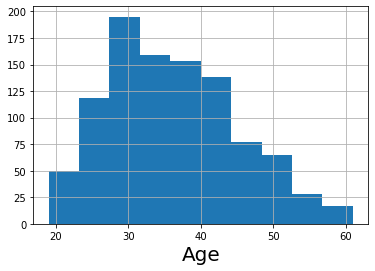

In [20]:
dataset1=ad_data["Age"]
# グラフの描画
plt.hist(dataset1)
plt.xlabel("Age", fontsize=20) 
plt.grid(True) 
plt.show()

Text(0.5, 0, 'Age')

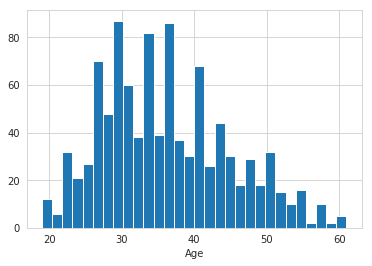

In [28]:
# TODO: Your code goes here

TODO 1:  **地域の収入と年齢を示す共同プロットを作成します。**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


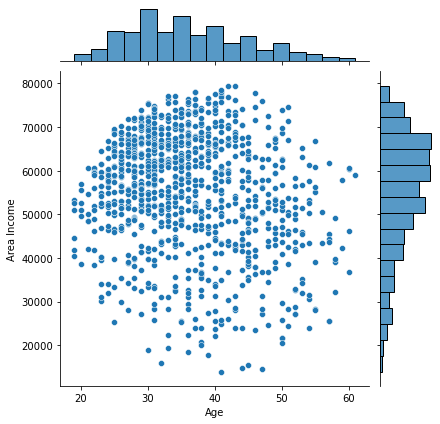

In [23]:
sns.jointplot('Age','Area Income' , data=ad_data)

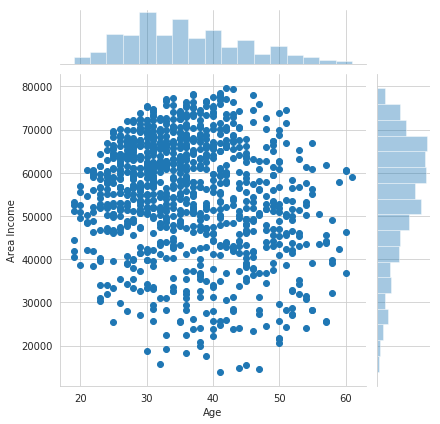

In [29]:
# TODO: Your code goes here

TODO 2:  **サイトで費やされた毎日の時間と年齢のkde分布を示すジョイントプロットを作成します。**

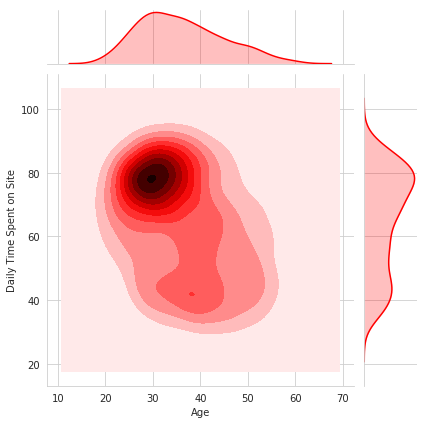

In [30]:
# TODO: Your code goes here

TODO 1: **Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

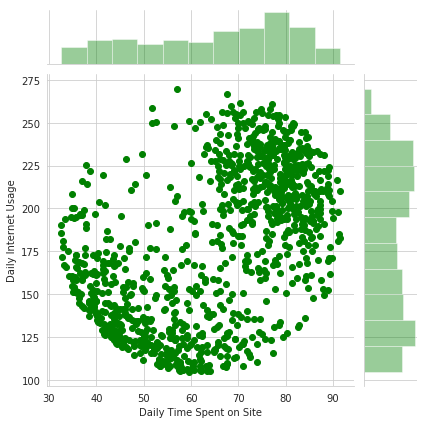

In [31]:
# TODO: Your code goes here

# ロジスティック回帰

ロジスティック回帰は、教師あり機械学習プロセスです。これは線形回帰に似ていますが、連続値を予測するのではなく、ロジスティック関数を使用して確率を推定しようとします。名前に回帰がありますが、分類用であることに注意してください。
値の推定には線形回帰を使用できますが、観測のクラスを予測するにはロジスティック回帰が最適です。

次に、トレインテスト分割を実行して、モデルをトレーニングします。ここでは、トレーニングしたい列を自由に選択できます。

In [24]:
from sklearn.model_selection import train_test_split

次に、特徴量とラベルを定義しましょう。簡単に言えば、特徴量が入力されます。ラベルが出力されます。これは、分類と回帰の両方の問題に当てはまります。

In [40]:
#X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income']]
y = ad_data['Clicked on Ad']

TODO 2: **Split the data into training set and testing set using train_test_split**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [35]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## 予測と評価
**次に、テストデータの値を予測します。**

In [43]:
predictions = logmodel.predict(X_test)

**モデルの分類レポートを作成します。**

In [38]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       206
           1       0.90      0.89      0.89       194

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



Copyright 2021 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.